<a href="https://colab.research.google.com/github/FernandoElizarraras7/TRABAJO_FINAL_FINANZAS/blob/main/TRABAJO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PORTAFOLIO DE INVERSION
Un portafolio de inversión se crea con el propósito de optimizar el rendimiento ajustado al riesgo y cumplir con metas financieras específicas. Se estructura con el objetivo de maximizar el rendimiento ajustado al riesgo y cumplir con los objetivos financieros específicos del inversor, adaptándose a su perfil de riesgo, horizonte temporal y tolerancia personal hacia la volatilidad del mercado.

### Acciones seleccionadas
Se han seleccionado tres acciones prominentes: Amazon (AMZN), Netflix (NFLX) y Meta Platforms (META). Estas acciones se han elegido por su significativa presencia en el mercado tecnológico y de entretenimiento, representando sectores de alto crecimiento y relevancia en la economía actual. La elección de estas acciones se basa en su liquidez, volatilidad histórica y potencial de retorno, aspectos fundamentales en la construcción de un portafolio diversificado. Sin embargo, cualquier persona que tenga acceso al programa puede cambiar y utilizar las acciones que prefiera.

### Utilidad y aplicación
*   Para Inversores: Permite a los inversores evaluar y comparar diferentes estrategias de inversión, ayudándoles a construir portafolios que maximicen el rendimiento potencial mientras gestionan el riesgo de manera efectiva.
*   Para Analistas Financieros: Facilita el análisis de la volatilidad histórica y la relación entre riesgo y rendimiento en portafolios diversificados, proporcionando insights valiosos para la toma de decisiones de inversión informadas.
*   Para Estudiantes y Académicos: Sirve como una herramienta educativa para entender conceptos como la diversificación, la optimización de portafolios y la teoría moderna de carteras en finanzas.

Este programa desarrollado en R tiene como objetivo principal facilitar el análisis y la optimización de portafolios de inversión utilizando datos históricos de precios de acciones obtenidos de Yahoo Finance. Además no solo proporciona cálculos precisos y gráficos intuitivos, sino que también ofrece una plataforma robusta para explorar y experimentar con diferentes estrategias de inversión en un entorno controlado y reproducible.













Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘timetk’


The following object is masked from ‘package:base’:

    %||%


Warning message:
“Non-numeric columns being dropped: date”
Using column `date` for date_var.



Rendimiento del portafolio: 0.2007286 
Riesgo del portafolio: 0.4145482 
Sharpe Ratio: 0.4842105 


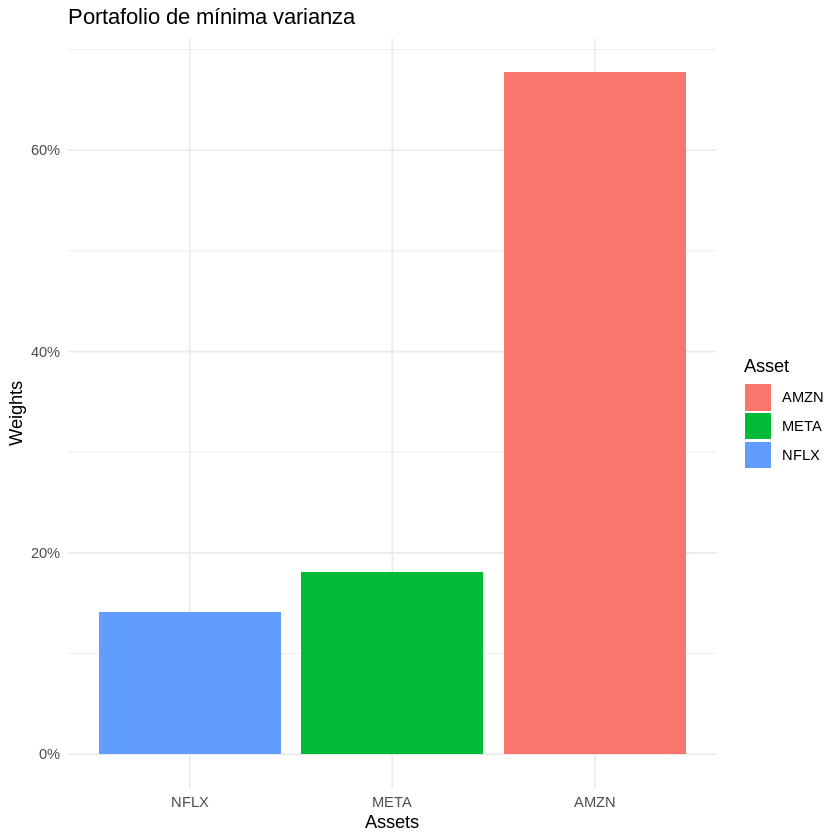

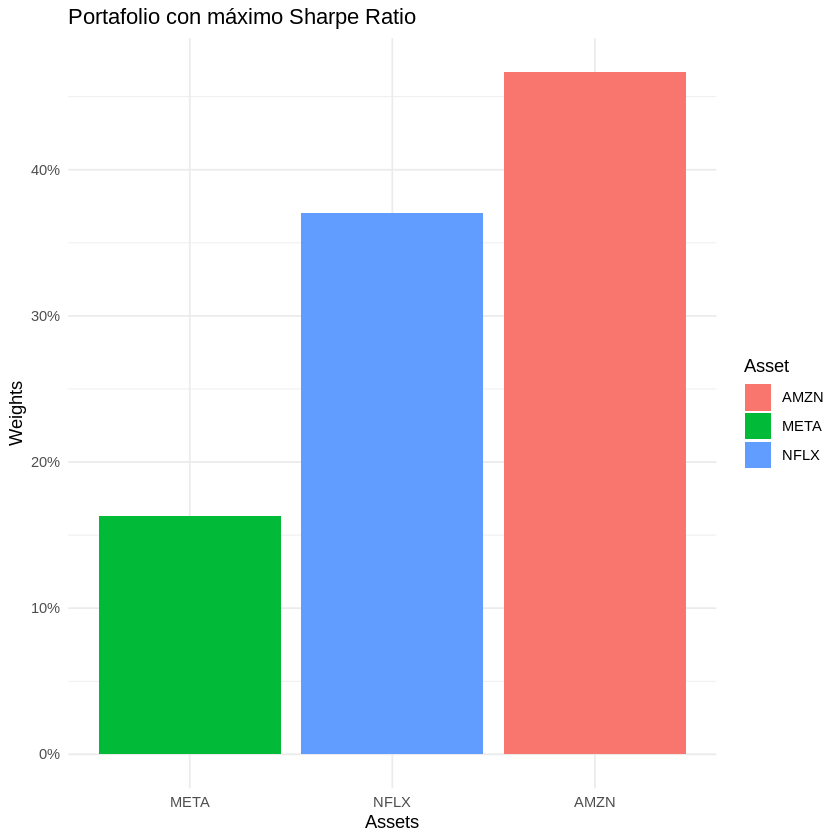

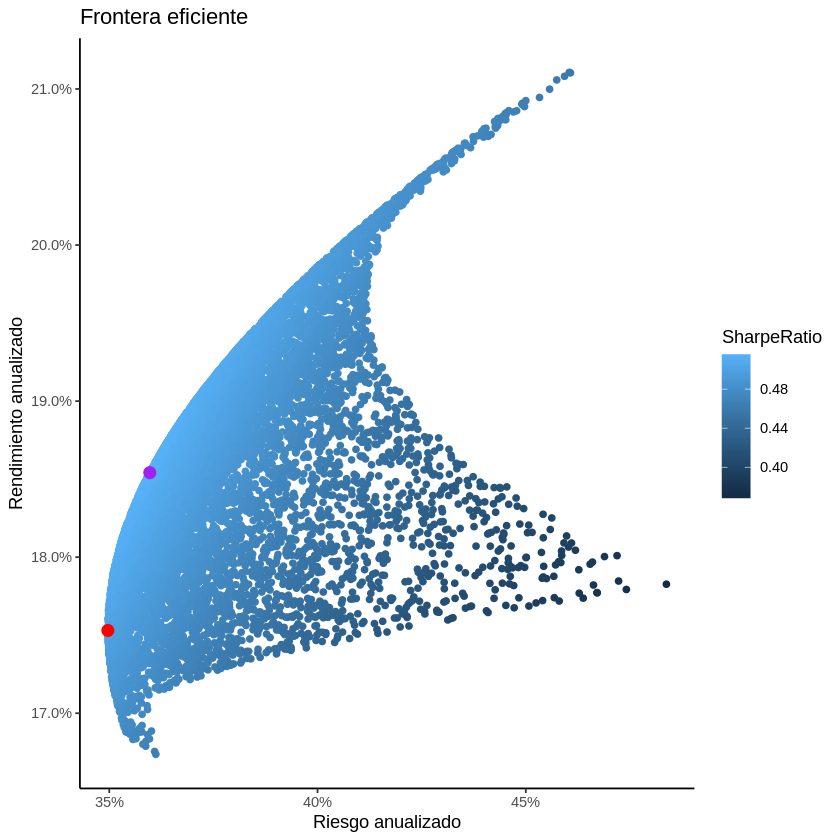

In [4]:
# Paqueterías necesarias
install.packages("tidyquant")
install.packages("tidyr")
install.packages("ggplot2")
install.packages("timetk")
library(tidyquant)  # Descargar datos financieros
library(tidyr)      # Manipular y transformar datos
library(ggplot2)    # Crear gráficos
library(timetk)     # Manipular series de tiempo

# Descargar datos de Yahoo Finance
tickers <- c('AMZN', 'NFLX', 'META')

# Ajusta las fechas de inicio y fin aquí
start_date <- '2020-01-01'  # Fecha de inicio
end_date <- '2024-06-24'    # Fecha de fin
precios <- tq_get(tickers, from = start_date, to = end_date, get = 'stock.prices')

# Calcular rendimientos logarítmicos diarios
log_ret_tidy <- precios %>%
  group_by(symbol) %>%
  tq_transmute(select = adjusted, mutate_fun = periodReturn, period = 'daily', col_rename = 'ret', type = 'log')

# Transformar formato a series de tiempo
log_ret_xts <- log_ret_tidy %>%
  spread(symbol, value = ret) %>%
  tk_xts()

# Calcular rendimientos y covarianzas
mean_ret <- colMeans(log_ret_xts)
cov_mat <- cov(log_ret_xts) * 252

# Asignar pesos aleatorios al portafolio y ajustarlos
wts <- runif(length(tickers))
wts <- wts / sum(wts)

# Calcular rendimiento y riesgo del portafolio
port_returns <- (sum(wts * mean_ret) + 1)^252 - 1
port_risk <- sqrt(t(wts) %*% (cov_mat %*% wts))

# Calcular Sharpe Ratio asumiendo una tasa libre de riesgo de 0%
sharpe_ratio <- port_returns / port_risk

# Mostrar resultados del portafolio inicial
cat("Rendimiento del portafolio:", port_returns, "\n")
cat("Riesgo del portafolio:", port_risk, "\n")
cat("Sharpe Ratio:", sharpe_ratio, "\n")

# Simulación y optimización de portafolios
num_port <- 10000
portfolios <- replicate(num_port, {
  wts <- runif(length(tickers))
  wts <- wts / sum(wts)
  port_ret <- (sum(wts * mean_ret) + 1)^252 - 1
  port_sd <- sqrt(t(wts) %*% (cov_mat %*% wts))
  sharpe_ratio <- port_ret / port_sd
  c(wts, port_ret, port_sd, sharpe_ratio)})

# Convertir resultados en un dataframe
portfolio_values <- as.data.frame(t(portfolios))
colnames(portfolio_values) <- c(tickers, "Return", "Risk", "SharpeRatio")

# Identificar portafolios de mínima varianza y máximo Sharpe Ratio
min_var <- portfolio_values[which.min(portfolio_values$Risk),]
max_sr <- portfolio_values[which.max(portfolio_values$SharpeRatio),]

# Graficar portafolio de mínima varianza
min_var_plot <- min_var %>%
  gather(key = Asset, value = Weights, -Return, -Risk, -SharpeRatio)
p1 <- ggplot(min_var_plot, aes(x = reorder(Asset, Weights), y = Weights, fill = Asset)) +
  geom_bar(stat = 'identity') +
  theme_minimal() +
  labs(x = 'Assets', y = 'Weights', title = "Portafolio de mínima varianza") +
  scale_y_continuous(labels = scales::percent)
print(p1)

# Graficar portafolio de máximo Sharpe Ratio
max_sr_plot <- max_sr %>%
  gather(key = Asset, value = Weights, -Return, -Risk, -SharpeRatio)
p2 <- ggplot(max_sr_plot, aes(x = reorder(Asset, Weights), y = Weights, fill = Asset)) +
  geom_bar(stat = 'identity') +
  theme_minimal() +
  labs(x = 'Assets', y = 'Weights', title = "Portafolio con máximo Sharpe Ratio") +
  scale_y_continuous(labels = scales::percent)
print(p2)

# Graficar frontera eficiente
efficient_frontier <- ggplot(portfolio_values, aes(x = Risk, y = Return, color = SharpeRatio)) +
  geom_point() +
  geom_point(data = min_var, aes(x = Risk, y = Return), color = 'red', size = 3) +
  geom_point(data = max_sr, aes(x = Risk, y = Return), color = 'purple', size = 3) +
  theme_classic() +
  scale_y_continuous(labels = scales::percent) +
  scale_x_continuous(labels = scales::percent) +
  labs(x = 'Riesgo anualizado', y = 'Rendimiento anualizado', title = "Frontera eficiente")
print(efficient_frontier)